# Load pickled model #

In [72]:
import pickle

# MODEL_PICKLE = '../trained_models/2020-02-29 03:22:13.582245_best.pkl'
MODEL_PICKLE = '../trained_models/2020-02-29 12:54:14.730240_best.pkl'

with open(MODEL_PICKLE, 'rb') as file:
    model = pickle.load(file)

In [73]:
model

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=ConvNet(
    (layers): Sequential(
      (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (8): Flatten()
      (9): Linear(in_features=7200, out_features=64, bias=True)
      (10): Dropout(p=0.3, inplace=False)
      (11): ReLU()
      (12): Linear(in_features=64, out_features=64, bias=True)
      (13): Dropout(p=0.3, inplace=False)
      (14): ReLU()
      (15): Linear(in_features=64, out_features=11, bias=True)
      (16): Softm

# Load dataset #

In [3]:
from happy_szczurki.datasets import Dataset, DatasetIterator, LABELS_MAPPING, REV_LABELS_MAPPING

DATASET_PATH = '../data/converted/ch1-2018-11-20_10-23-08_0000008.wav.npz'

dataset = Dataset(DATASET_PATH, use_mapping=LABELS_MAPPING)

(12, 1, 65, 65)


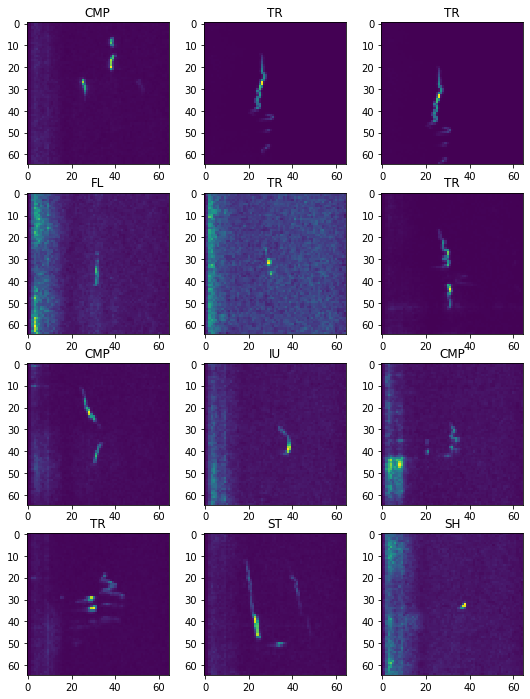

y_pred [6 9 7 5 5 7 3 4 4 9 6 2]
y_true [7 9 9 5 9 9 7 8 7 9 6 2]


In [76]:
import numpy as np
import matplotlib.pyplot as plt

data_iterator = dataset.sample_iterator(100, batch_size=12, balanced=True, window_size=257, resize_to=(65, 65))

X, y = next(data_iterator.__iter__())
# X.reshape([-1, 1, 65, 65])
X = np.expand_dims(X, 1)
print(X.shape)

fig, axs = plt.subplots(4, 3, figsize=(9,12))
for i in range(12):
    axs[i//3, i%3].imshow(X[i,0])
    axs[i//3, i%3].set_title(REV_LABELS_MAPPING[y[i]] or 'None')
plt.show()

y_pred = model.predict(X)
print('y_pred', y_pred)
print('y_true', y)

# Load Lime #

In [70]:
# NOTE: https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20images%20-%20Pytorch.ipynb
from lime import lime_image

def predict_fn(images):
    images = np.expand_dims(images[:,:,:,0], 1)
    return model.predict_proba(images)
    

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(X[6,0], predict_fn, top_labels=10, hide_color=0, num_samples=64*64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

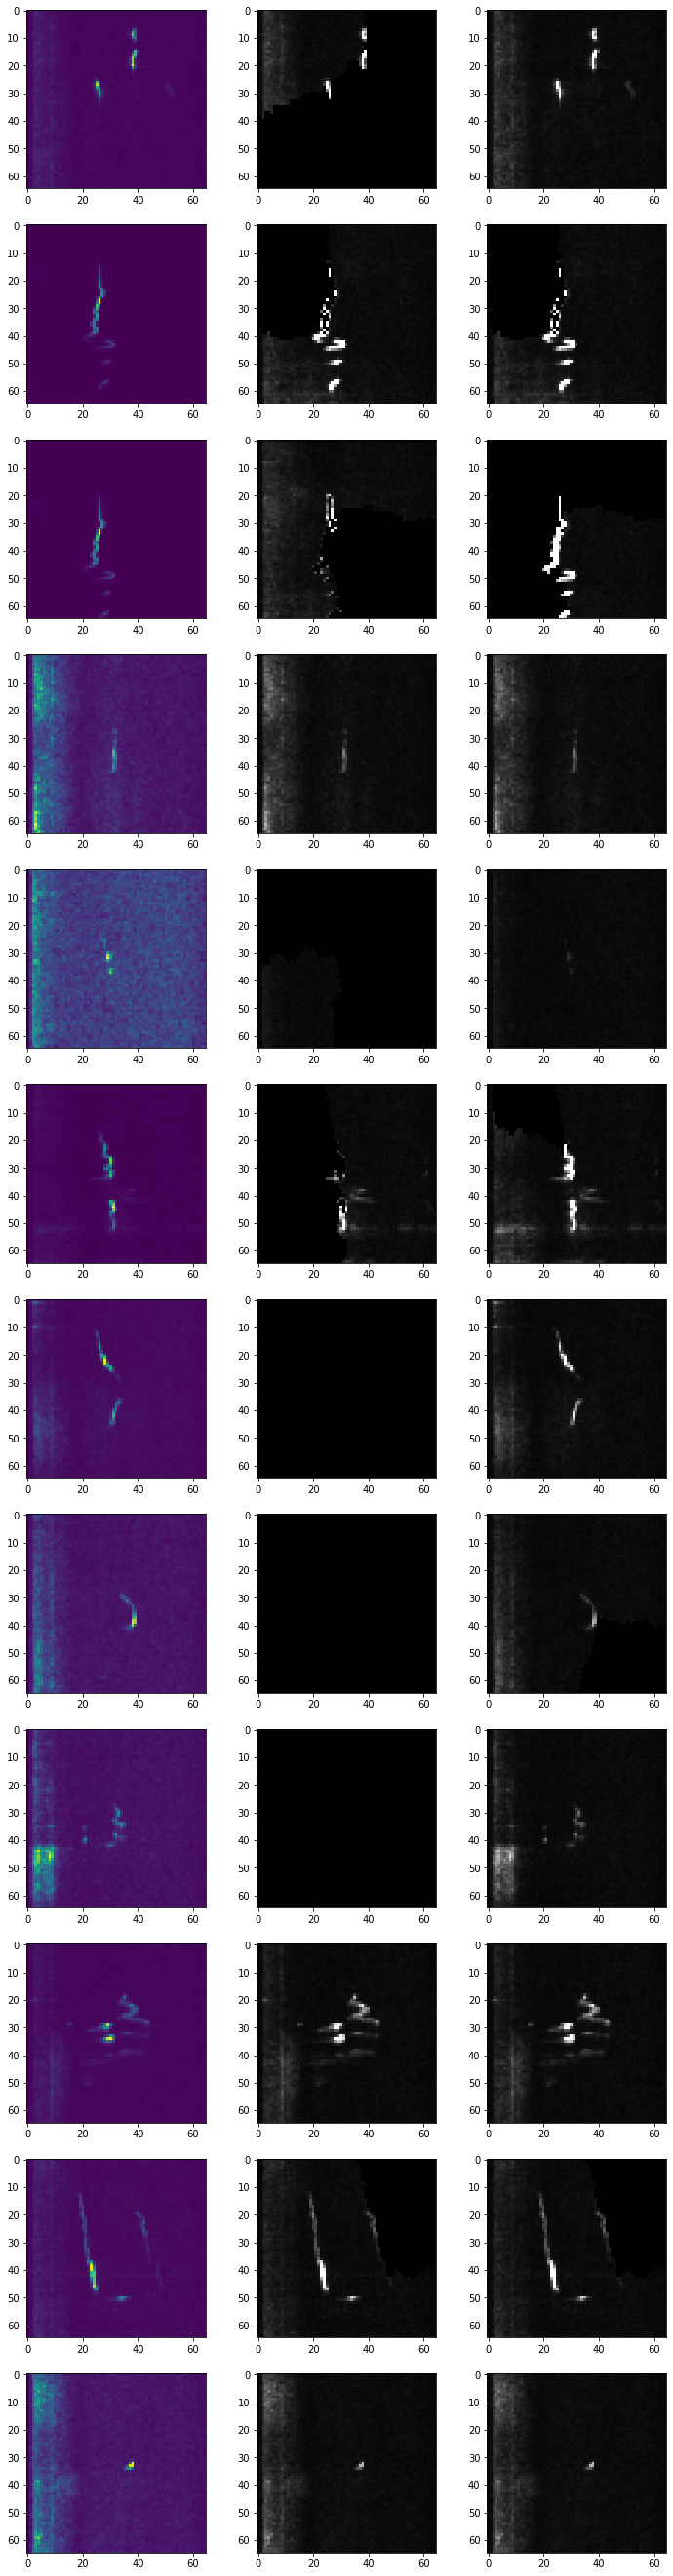

In [78]:
fig, axs = plt.subplots(len(X), 3, figsize=(12, 4*len(X)))
for i in range(len(X)):
    axs[i,0].imshow(X[i,0])
    explanation = explainer.explain_instance(X[i,0], predict_fn, top_labels=10, hide_color=0, num_samples=64*64)
    temp, mask = explanation.get_image_and_mask(y[i], positive_only=True, num_features=5, hide_rest=True)
    axs[i,1].imshow(temp)
    temp, mask = explanation.get_image_and_mask(y_pred[i], positive_only=True, num_features=5, hide_rest=True)
    axs[i,2].imshow(temp)
    
plt.show()
